In [2]:
!pip install networkx
!pip install graphviz
!pip install python-abc

  Using cached python-abc-0.2.0.tar.gz (7.4 kB)
  Created wheel for python-abc: filename=python_abc-0.2.0-py3-none-any.whl size=7535 sha256=5a2a67d5e86f72cc6dc437a46807166e198c4ae257ba09c74a10ed58ba1b9fd4
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\19\a0\40\3ddbf120078168d0f76269e45fdf9465729c151ba0d8352d69
Successfully built python-abc


In [38]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
from abc import ABC, abstractmethod

{}

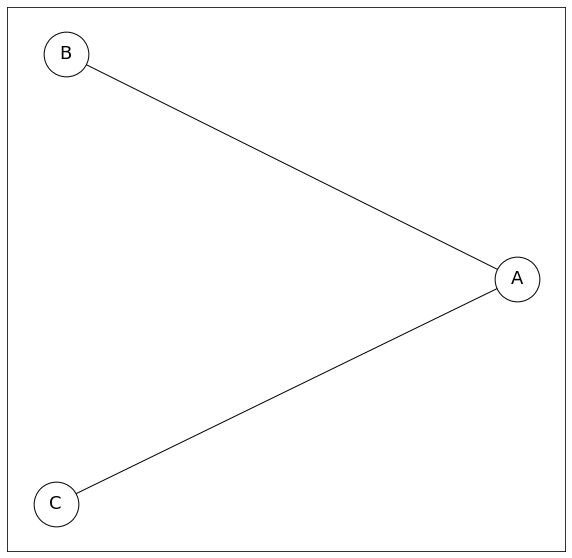

In [39]:
g = nx.Graph()
labels = {}
node1_label = 'A'
node2_label = 'B'
node3_label = 'C'
g.add_edge(node1_label, node2_label)
g.add_edge(node1_label,node3_label)
#labels[(node1_label, node2_label)] = str(edge.d)
_, ax = plt.subplots(figsize=(10,10))
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos, node_size=2000, font_size=18, node_color='white', edgecolors='black', ax=ax)
nx.draw_networkx_edge_labels(g, pos, font_size=18, edge_labels=labels, ax=ax)

In [40]:
class Edge:
    def __init__(self, node1, node2):
        self.id = random.getrandbits(64) #Danh dau ten canh bang so
        self.node1 = node1
        self.node2 = node2
    
    def __hash__(self):
        return hash(self.id)
    
    def __eq__(self, other): #So sach voi doi tuong khac cung lop bang id
        return self.__class__ == other.__class__ and\
            self.id == other.id

In [41]:
class Graph_node:
    def __init__(self, name):
        self.name = name
        self.id = random.getrandbits(64) #Danh dau ten nut bang so
        self.nodes = {}
        
    def add_nodes(self, nodes):
        for i, node in enumerate(nodes):
            edge = Edge(self, node)
            self.nodes[edge] = node
        
    def get_state(self):
        return self.name
        
    def __hash__(self):
        return hash(self.id)
    
    def __eq__(self, other): #So sach voi doi tuong khac cung lop bang id
        return self.__class__ == other.__class__ and\
            self.id == other.id

In [42]:
class Graph:
    def __init__(self, root_node, directed):
        self.root_node = root_node #Node chinh
        self.directed = directed #True : co huong, False: Khong huong
        self.discrete = [] #Dung de chua cac node roi rac, khong huong.
        self.labels = [] #Dung de chua thong tinh cua cac dinh
    def get_nodes(self):# co chuc nang lay node
        cur_nodes = [self.root_node]
        visited_edges = set()
        visited_nodes = set()
        while len(cur_nodes) > 0:
            cur_node = cur_nodes.pop(0)
            for edge in cur_node.nodes:
                node = cur_node.nodes[edge]
                
                if edge in visited_edges:
                    continue
                
                visited_edges.add(edge)
                
                if node in visited_nodes:
                    node = None
                else:
                    visited_nodes.add(node)
                    cur_nodes.append(node)
                yield node, edge
    def draw_networkx(self): #Ve do thi bang networkx
        self.g = nx.DiGraph() if self.directed else nx.Graph() #nx. DiGraph co huong, Graph khong huong
        for _, edge in self.get_nodes():
            node1_label = edge.node1.name
            node2_label = edge.node2.name
            self.g.add_edge(node1_label, node2_label)
            if node1_label not in self.labels:
                self.labels.append(node1_label)
            if node2_label not in self.labels:
                self.labels.append(node2_label)
        _, ax = plt.subplots(figsize=(10,10))
        if(self.discrete!=[]):
            for node in self.discrete:
                self.g.add_node(node)
                self.labels.append(node)
        self.pos = nx.kamada_kawai_layout(self.g)
        nx.draw_networkx(self.g, self.pos, node_size=2000, font_size=18, node_color='white', edgecolors='black', ax=ax)
    def add_one_node(self,node:[Graph_node]):#Them mot node roi rac.
        self.discrete.append(node.name)
    def draw_color_node(self,labels_colors:{}):
        labels = list(labels_colors.keys())
        colors = list(labels_colors.values())
        _, ax = plt.subplots(figsize=(10,10))
        nx.draw_networkx(self.g, self.pos, node_size=2000, nodelist=labels,font_size=18, node_color=colors, edgecolors='black', ax=ax)
    def get_labels(self):#Lay ten cua cac dinh
        return self.labels

In [43]:
class Constraint(ABC):
    def __init__(self, variables):
        self.variables = variables
        
    @abstractmethod
    def satisfied(self, assignment):
        pass

In [44]:
class MapColoringConstraint(Constraint):
    def __init__(self,place1,place2):
        super().__init__([place1,place2])
        self.place1=place1
        self.place2=place2
    def satisfied(self,assignment):
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        return assignment[self.place1]!=assignment[self.place2]

In [45]:
class CSP_Problem:
    def __init__(self, root_node):
        self.root_node = root_node #Node chinh
        self.name_node = [] #Dung de chua ten cac node
        self.constrains = []#Dung de chua cac cap rang buoc
        self.NodeConstrain()
    def get_nodes(self):# co chuc nang lay node
        cur_nodes = [self.root_node]
        visited_edges = set()
        visited_nodes = set()
        while len(cur_nodes) > 0:
            cur_node = cur_nodes.pop(0)
            for edge in cur_node.nodes:
                node = cur_node.nodes[edge]
                
                if edge in visited_edges:
                    continue
                
                visited_edges.add(edge)
                
                if node in visited_nodes:
                    node = None
                else:
                    visited_nodes.add(node)
                    cur_nodes.append(node)
                yield node, edge
    def NodeConstrain(self): #Dinh nghia rang buoc cho cac node
        for _, edge in self.get_nodes():
            node1_label = edge.node1.name
            node2_label = edge.node2.name
            self.constrains.append(MapColoringConstraint(node1_label,node2_label))
    def Get_Constrains_Node(self):#Tra ve tap cac rang buoc
        return self.constrains

In [46]:
# domains là Dictionary
# variables là List
# constraints là Dictionary

class CSP_solver():
    def __init__(self, variable, domains):
        self.variables = variables
        self.domains = domains
        self.constraints = {}
        self.list_assignment = []
        for variable in self.variables:
            self.constraints[variable]=[]
            if variable not in self.domains:
                raise LookupError("Every varible should have a domain assigned to it")
    def add_constraint(self,constraint):
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)
    def consistent(self,variable,assignment):
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True
    def backtracking_search(self, assignment={}):
        if len(assignment)==len(self.variables):
            #print(assignment)
            self.list_assignment.append(assignment)
            return assignment
        unassigned=[v for v in self.variables if v not in assignment]
        first=unassigned[0]
        for value in self.domains[first]:
            local_assignment=assignment.copy()
            local_assignment[first]=value
            if self.consistent(first,local_assignment):
                result=self.backtracking_search(local_assignment)
                #if result is not None:
                #    return result
        return None
    def get_list_assignment(self):
        return self.list_assignment

In [47]:
variables=["SA","WA","NT","Q","NSW","V","T"]
domains={}
for variable in variables:
    domains[variable]=["Red","Green","Blue"]
    
csp=CSP_solver(variables,domains)
# for i in range(0,len(variables)-1):
#     for j in range(i+1,len(variables)-2):
#         csp.add_constraint(MapColoringConstraint(variables[i],variables[j]))
    
csp.add_constraint(MapColoringConstraint('SA','WA'))
csp.add_constraint(MapColoringConstraint('SA','NT'))
csp.add_constraint(MapColoringConstraint('SA','Q'))
csp.add_constraint(MapColoringConstraint('SA','NSW'))
csp.add_constraint(MapColoringConstraint('SA','V'))
csp.add_constraint(MapColoringConstraint('WA','NT'))
csp.add_constraint(MapColoringConstraint('NT','Q'))
csp.add_constraint(MapColoringConstraint('Q','NSW'))
csp.add_constraint(MapColoringConstraint('NSW','V'))



solution=csp.backtracking_search()
#if solution is None:
#    print("No Solution has been found")
#else:
#    print(solution)
sl = csp.get_list_assignment()
print(sl)   
for i in sl:
    print(i)

[{'SA': 'Red', 'WA': 'Green', 'NT': 'Blue', 'Q': 'Green', 'NSW': 'Blue', 'V': 'Green', 'T': 'Red'}, {'SA': 'Red', 'WA': 'Green', 'NT': 'Blue', 'Q': 'Green', 'NSW': 'Blue', 'V': 'Green', 'T': 'Green'}, {'SA': 'Red', 'WA': 'Green', 'NT': 'Blue', 'Q': 'Green', 'NSW': 'Blue', 'V': 'Green', 'T': 'Blue'}, {'SA': 'Red', 'WA': 'Blue', 'NT': 'Green', 'Q': 'Blue', 'NSW': 'Green', 'V': 'Blue', 'T': 'Red'}, {'SA': 'Red', 'WA': 'Blue', 'NT': 'Green', 'Q': 'Blue', 'NSW': 'Green', 'V': 'Blue', 'T': 'Green'}, {'SA': 'Red', 'WA': 'Blue', 'NT': 'Green', 'Q': 'Blue', 'NSW': 'Green', 'V': 'Blue', 'T': 'Blue'}, {'SA': 'Green', 'WA': 'Red', 'NT': 'Blue', 'Q': 'Red', 'NSW': 'Blue', 'V': 'Red', 'T': 'Red'}, {'SA': 'Green', 'WA': 'Red', 'NT': 'Blue', 'Q': 'Red', 'NSW': 'Blue', 'V': 'Red', 'T': 'Green'}, {'SA': 'Green', 'WA': 'Red', 'NT': 'Blue', 'Q': 'Red', 'NSW': 'Blue', 'V': 'Red', 'T': 'Blue'}, {'SA': 'Green', 'WA': 'Blue', 'NT': 'Red', 'Q': 'Blue', 'NSW': 'Red', 'V': 'Blue', 'T': 'Red'}, {'SA': 'Green', 'W

In [48]:
node_NT = Graph_node('NT')
node_WA = Graph_node('WA')
node_SA = Graph_node('SA')
node_Q = Graph_node('Q')
node_NSW = Graph_node('NSW')
node_V = Graph_node('V')
node_T = Graph_node('T')

In [49]:
node_WA.add_nodes([node_NT, node_SA])
node_NT.add_nodes([node_SA, node_Q])
node_Q.add_nodes([node_SA,node_NSW])
node_SA.add_nodes([node_NSW,node_V])
node_NSW.add_nodes([node_V])

In [50]:
graph = Graph(node_WA, False)
graph.add_one_node(node_T)

In [51]:
csp_p = CSP_Problem(node_WA)
#print(csp_p.Get_Constrains_Node()[0].variables)
print(graph.get_labels())

[]


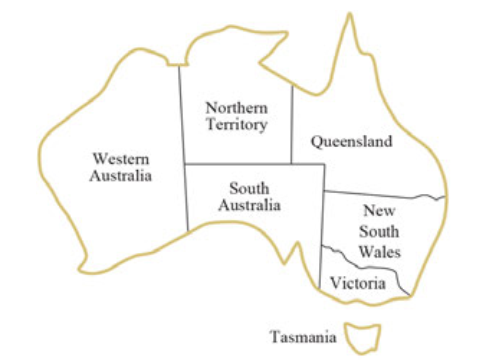

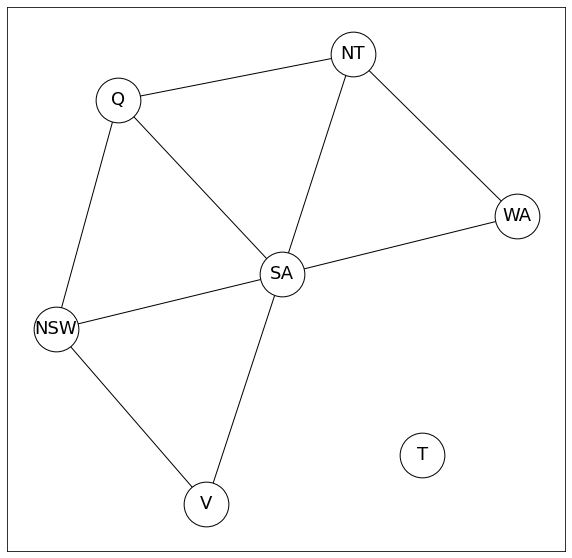

In [52]:
graph.draw_networkx()

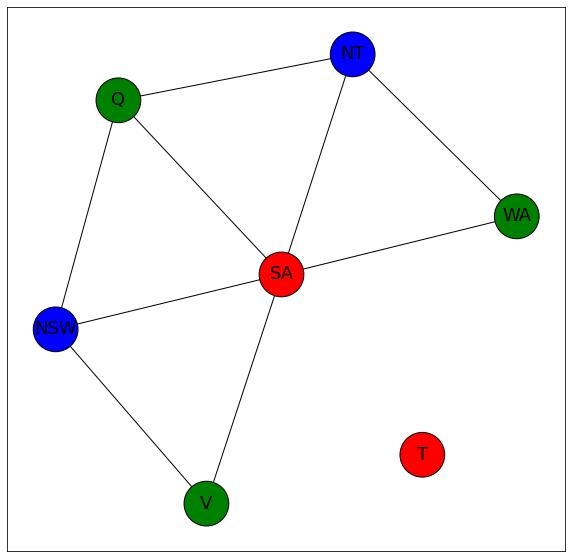

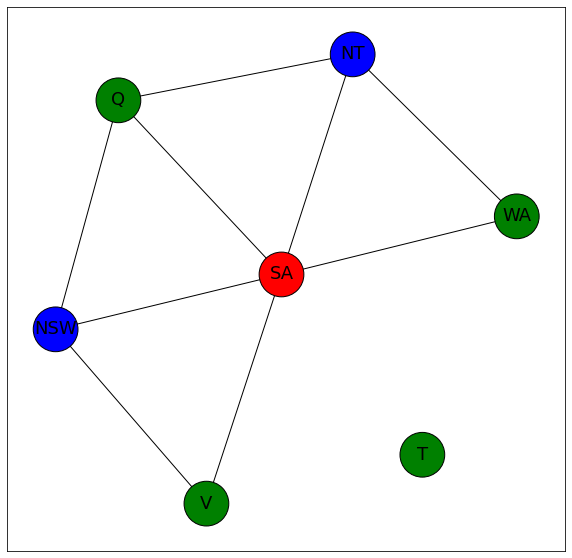

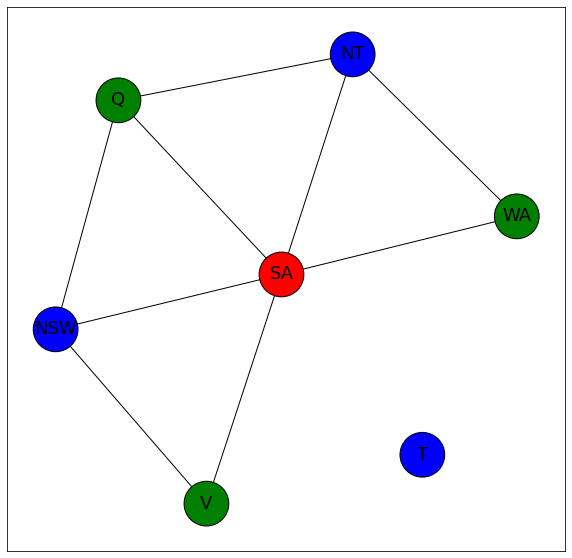

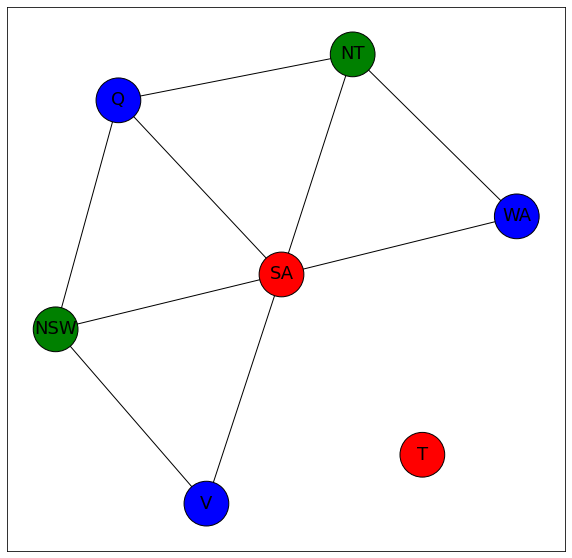

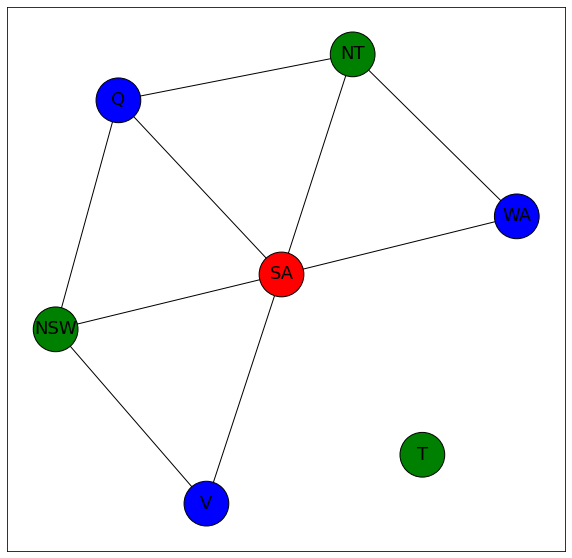

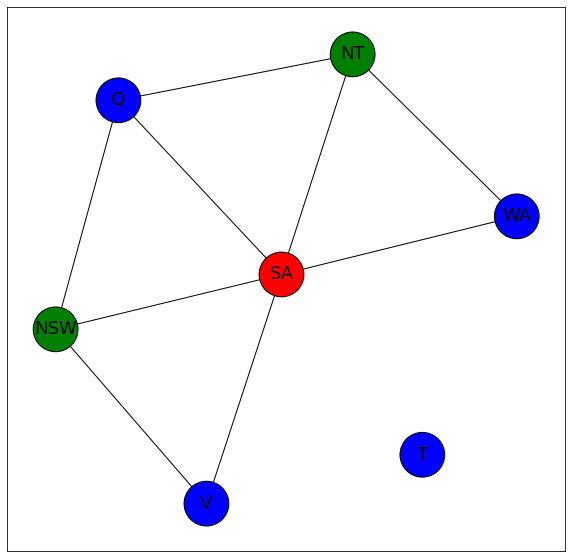

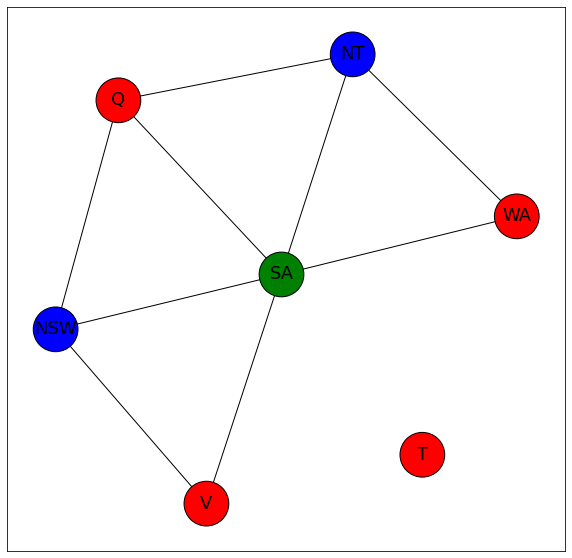

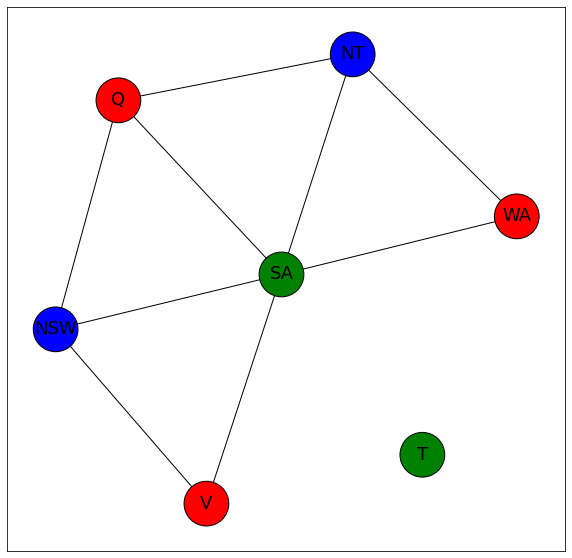

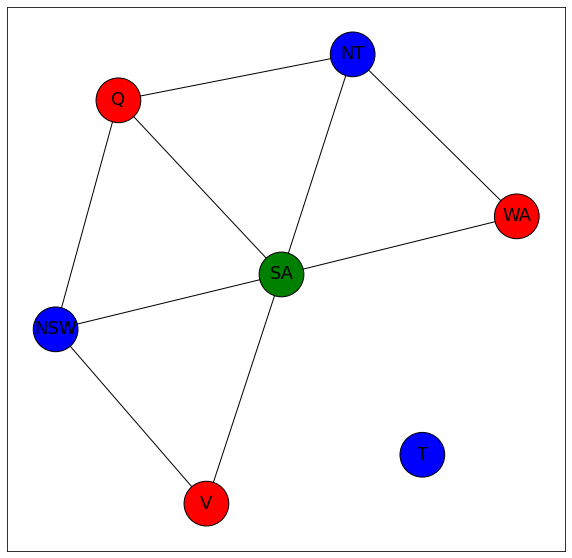

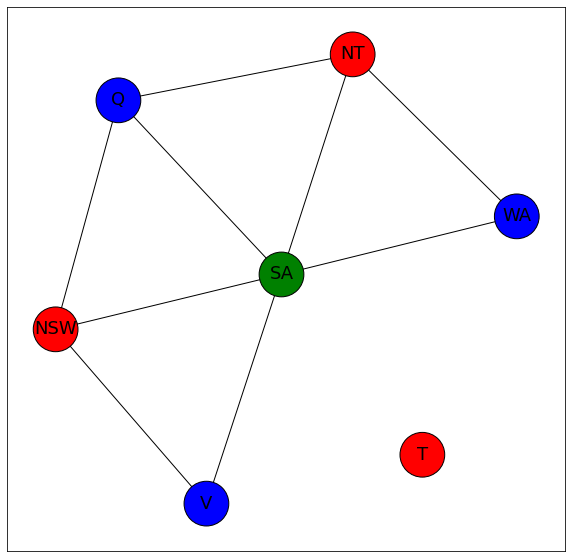

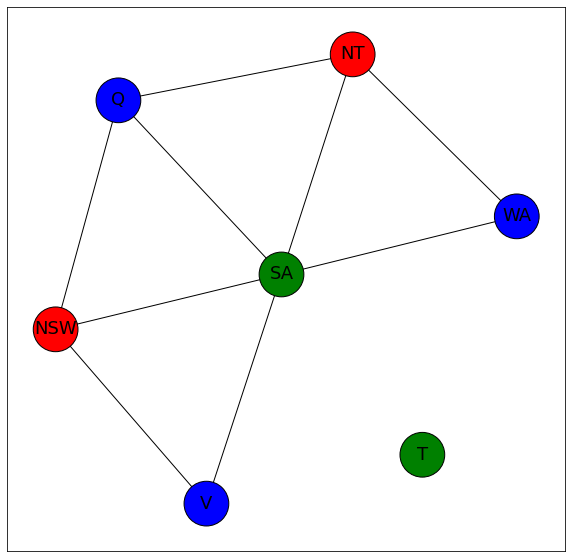

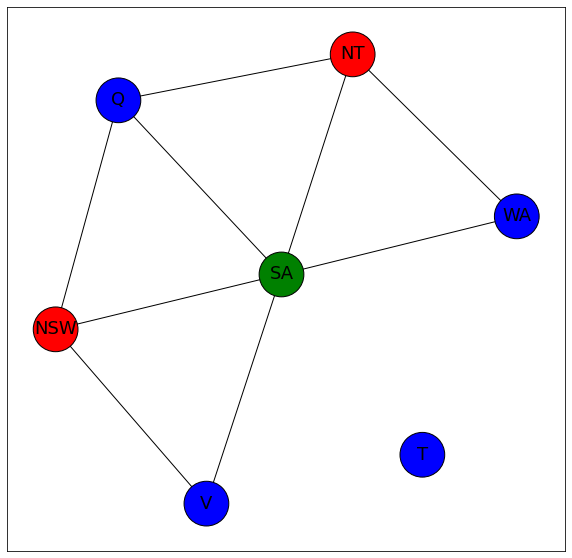

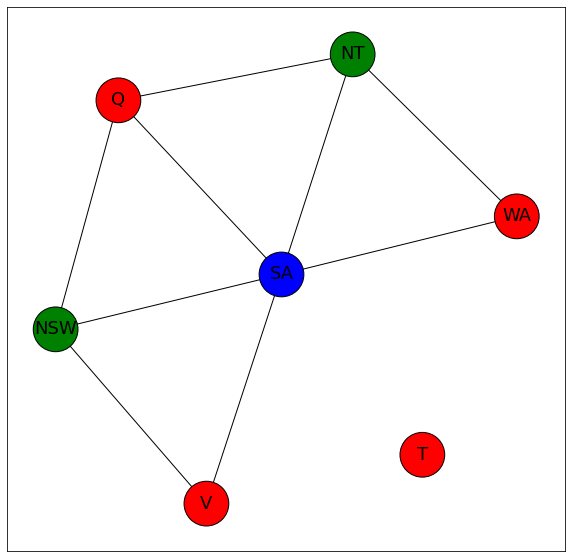

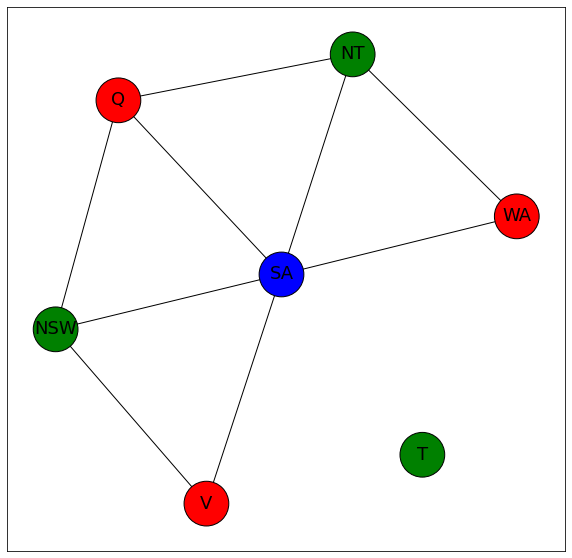

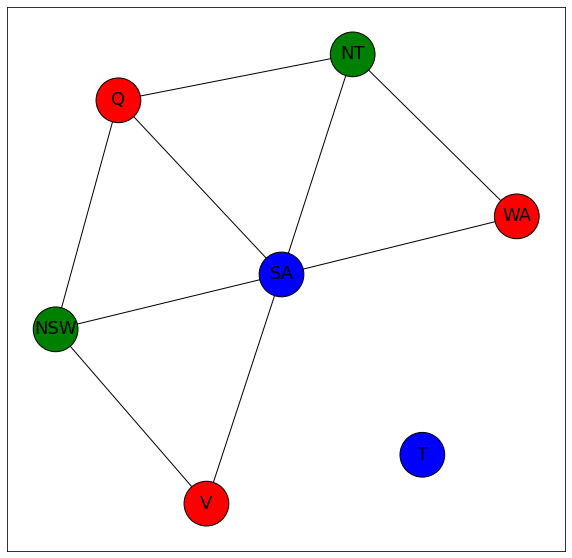

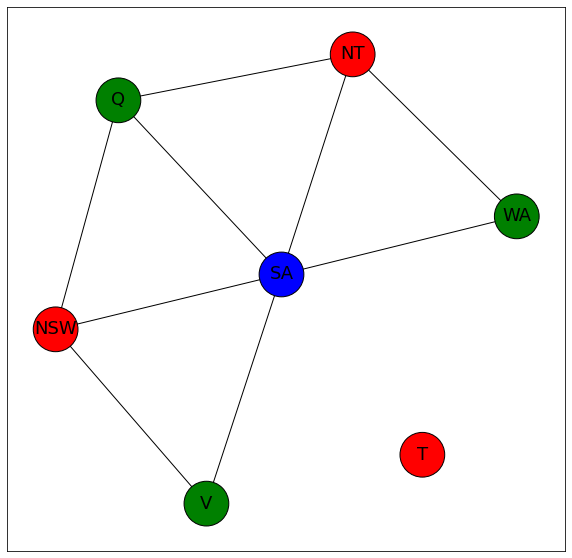

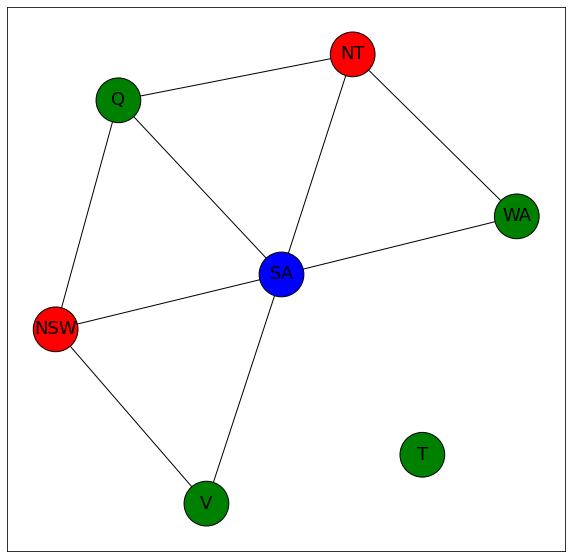

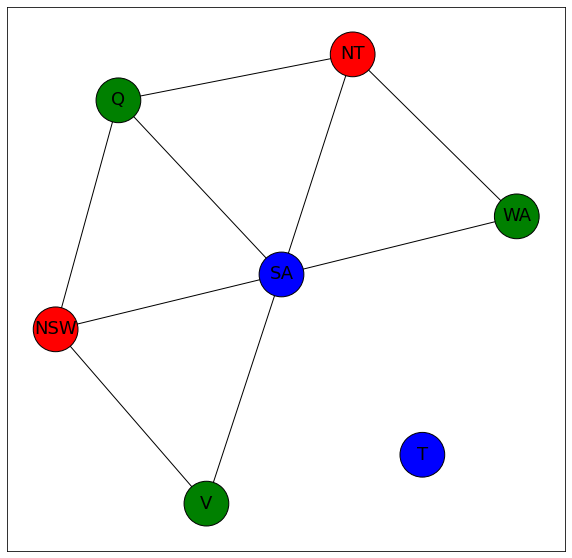

In [53]:
for i in sl:
    graph.draw_color_node(i)